# Develop Buoy Detector

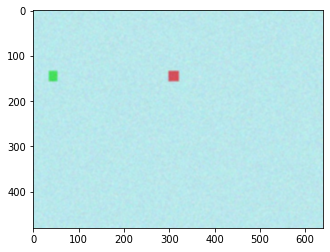

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# sample image
frame_number = 14
img = cv2.imread(f'buoy_simulation/frame_{frame_number:02d}.jpg')
img = np.flip(img, axis=2) # Convert BGR to RGB
img = cv2.boxFilter(img, -1, (5, 5))
fig, ax = plt.subplots()
plt.imshow(img)
plt.show()

# Detect buoys using RGB

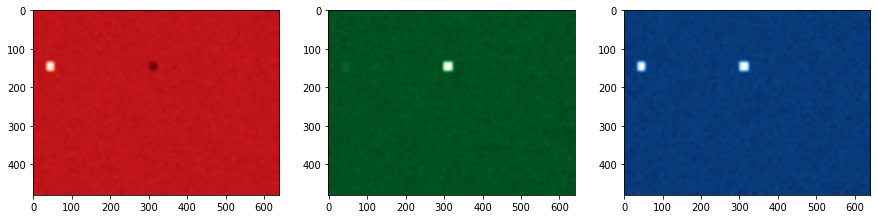

In [37]:
filter_size = (10, 10)
rfilt = cv2.boxFilter(img[:, :, 0], cv2.CV_32F, filter_size)
gfilt = cv2.boxFilter(img[:, :, 1], cv2.CV_32F, filter_size)
bfilt = cv2.boxFilter(img[:, :, 2], cv2.CV_32F, filter_size)
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].imshow(rfilt, cmap='Reds')
ax[1].imshow(gfilt, cmap='Greens')
ax[2].imshow(bfilt, cmap='Blues')
plt.show()

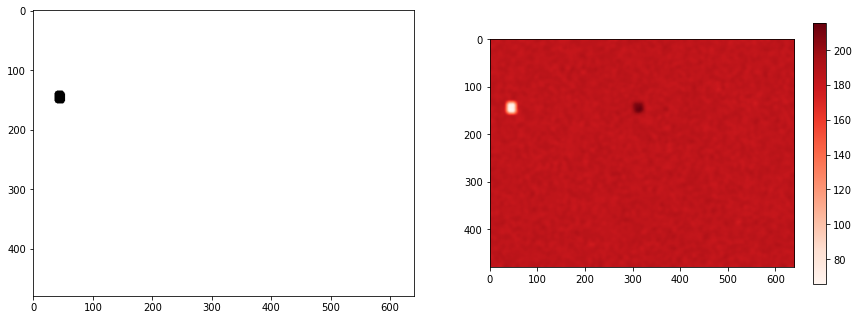

In [38]:
# Detect Green Buoy
img_threshold_green = np.logical_and(rfilt > 0, rfilt < 120)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(img_threshold_green, cmap='Greys')
r = ax[1].imshow(rfilt, cmap='Reds')
fig.colorbar(r, ax=ax[1], shrink=0.8)
plt.show()

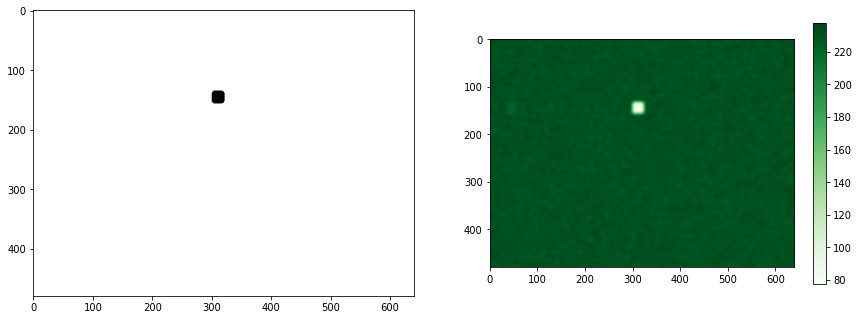

In [14]:
# Detect Red Buoy
img_threshold_red = np.logical_and(gfilt > 0, gfilt < 150)
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(img_threshold_red, cmap='Greys')
g = ax[1].imshow(gfilt, cmap='Greens')
fig.colorbar(g, ax=ax[1], shrink=0.8)
plt.show()

In [19]:
img_threshold_red

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

[145.51648352 310.44395604]


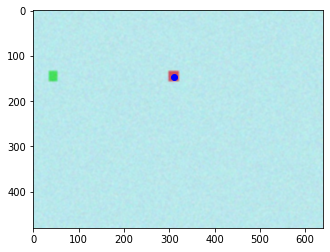

In [39]:
thresh = 0 # img_threshold_red values are either 0 or 1
avg_pixel_pos = np.average((np.argwhere(img_threshold_red>thresh)), axis=0)
print(avg_pixel_pos)

plt.imshow(img)
plt.plot(avg_pixel_pos[1], avg_pixel_pos[0], 'bo')
plt.show()

[145.59668508  44.45303867]


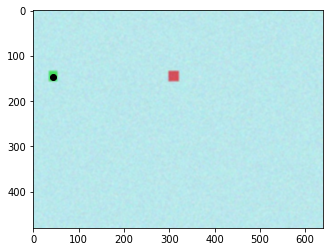

In [24]:
thresh = 0 # img_threshold_red values are either 0 or 1
avg_pixel_pos = np.average((np.argwhere(img_threshold_green>thresh)), axis=0)
print(avg_pixel_pos)

plt.imshow(img)
plt.plot(avg_pixel_pos[1], avg_pixel_pos[0], 'ko')
plt.show()

In [28]:
img8 = (img_threshold_green * 255 / np.max(img)).astype(np.uint8)
thresh8 = (thresh * 255 / np.max(img)).astype(np.uint8)
thresh, img_out = cv2.threshold(img8, thresh8, 255, cv2.THRESH_BINARY)
"""The image should still have one of two possible values at each pixel."""
contours, hierarchy = cv2.findContours(img_out, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# The return value contours will contain a list of all the contours on the image, where each contour is an np array of pixels along the boundary.

In [29]:
# There was only one contour in the img
for contour in contours:
    print(contour.shape)
    print(np.mean(contour, axis=0))

(63, 1, 2)
[[ 44.36507937 145.66666667]]


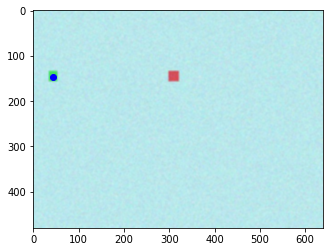

In [31]:
avg_pixel_pos = np.mean(contours[0], axis=0)[0]
plt.imshow(img)
plt.plot(avg_pixel_pos[0], avg_pixel_pos[1], 'bo')
plt.show()

# Do the same with red threshold to detect potential multiple red buoys

In [32]:
img8 = (img_threshold_red * 255 / np.max(img)).astype(np.uint8)
thresh8 = (thresh * 255 / np.max(img)).astype(np.uint8)
thresh, img_out = cv2.threshold(img8, thresh8, 255, cv2.THRESH_BINARY)
"""The image should still have one of two possible values at each pixel."""
contours, hierarchy = cv2.findContours(img_out, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# The return value contours will contain a list of all the contours on the image, where each contour is an np array of pixels along the boundary.

In [33]:
# There was only one contour in the img
for contour in contours:
    print(contour.shape)
    print(np.mean(contour, axis=0))

(72, 1, 2)
[[310.48611111 145.5       ]]


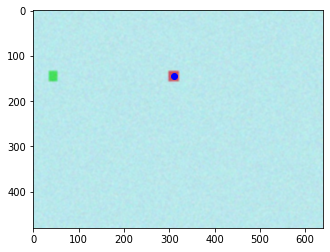

In [34]:
avg_pixel_pos = np.mean(contours[0], axis=0)[0]
plt.imshow(img)
plt.plot(avg_pixel_pos[0], avg_pixel_pos[1], 'bo')
plt.show()